# **Dowload Data from Kaggle**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 ! pip install -q kaggle

In [ ]:
%cd "/content/drive/MyDrive/BTL TTNT_HAUI/ClassificationPreumonia"

/content/drive/MyDrive/BTL TTNT_HAUI/ClassificationPreumonia


In [ ]:
 ! mkdir kaggle

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
%cd "/content/drive/MyDrive/BTL TTNT_HAUI/ClassificationPreumonia"

/content/drive/MyDrive/BTL TTNT_HAUI/ClassificationPreumonia


In [ ]:
! kaggle datasets list

ref                                                               title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data              Extrovert vs. Introvert Behavior Data                     15392  2025-05-21 04:26:52.443000          15011        348  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025           Global AI Job Market & Salary Trends 2025                529004  2025-06-01 07:20:49.537000           4734         76  0.9411765        
adilshamim8/social-media-addiction-vs-relationships               Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000          15377        230  1.0

In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir -p datasets

In [ ]:
! unzip chest-xray-pneumonia.zip -d datasets

Archive:  chest-xray-pneumonia.zip
replace datasets/chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Import Library**

In [ ]:
!pip install tensorflow

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                   ^^^^^^^^
  File "/usr/local/lib/py

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2

# **Path to data**

In [ ]:
base_dir = '/content/drive/MyDrive/BTL TTNT_HAUI/ClassificationPreumonia/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
imagen = plt.imread(os.path.join(train_dir, 'NORMAL/IM-0117-0001.jpeg'))
plt.imshow(imagen)

# **Loading images from directory using generator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)


Found 1473 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# **Build Model CNN**

In [ ]:
def create_model(input_shape , num_class):
  model = Sequential();
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape= input_shape))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(num_class, activation='softmax'))
  return model

In [ ]:
input_shape = (224, 224, 3)
num_class = 2

In [ ]:
model = create_model(input_shape, num_class)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,554 (36.92 MB)

 Trainable params: 9,679,554 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=100,
    # validation_data=val_generator,
    # validation_steps=4
)


KeyboardInterrupt: 

# **Evaluate**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=30)
print('test acc:', test_acc)

# **Save and Load Model**

In [ ]:
model.save("model/model2.10.h5")

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/BTL TTNT_HAUI/ClassificationPreumonia/model/model2.10.h5')

# **Predict**

In [ ]:
from google.colab import files
files.upload()

Saving small_20200614_155010_387631_xquangphoi_max_1800x1800_jpeg_7273a88b5f.jpg to small_20200614_155010_387631_xquangphoi_max_1800x1800_jpeg_7273a88b5f.jpg


{'small_20200614_155010_387631_xquangphoi_max_1800x1800_jpeg_7273a88b5f.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\x01\x05\x05\x05\x05\x05\x05\x05\x06\x06\x05\x08\x08\x07\x08\x08\x0b\n\t\t\n\x0b\x11\x0c\r\x0c\r\x0c\x11\x1a\x10\x13\x10\x10\x13\x10\x1a\x17\x1b\x16\x15\x16\x1b\x17) \x1c\x1c )/\'%\'/9339GDG]]}\xff\xc2\x00\x11\x08\x01\xf0\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00.\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x01\x02\x03\x04\x06\x00\x07\x08\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xf8\xcb\xbb\x8e\xee\xe3\xbb\xb8\xee\xee;\xbb\x8e\xe5\x90\x8b\x8b^3\x96u\xc5L\xb1\xa2\xb2\x14=#\x18x\xf5\x9a\xd9\x93E{\x8f\xba6\xf43

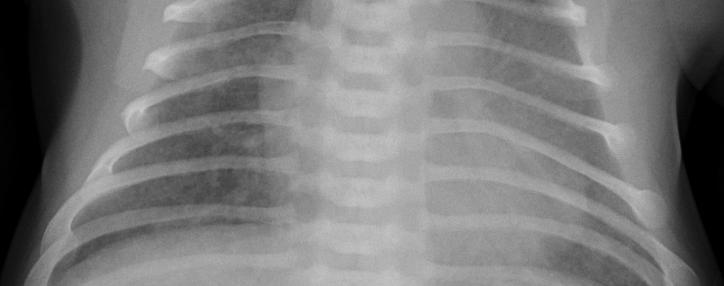

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[2.0585538e-05 9.9997938e-01]]
Có bị bệnh viên phổi


In [40]:
image_path = '/content/drive/MyDrive/BTL TTNT_HAUI/ClassificationPreumonia/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/Bản sao của person1642_bacteria_4352.jpeg'
img = cv2.imread(image_path)
cv2_imshow(img)
image = Image.open(image_path).resize((224, 224)).convert('RGB')
image=np.array(image)/255.0;
pred = model.predict(np.array([image]))
print(pred)
if np.argmax(pred) == 1 :
  print('Có bị bệnh viên phổi')
else:print('Không bị bệnh viêm phổi ')